In [ ]:
Пункт 2.3.1

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
file='C:\\Users\\fedor\\Downloads\\S02-hw-dataset.csv'
data = pd.read_csv(file, sep=',')
print(data.head()) #вывод первых строк датасета
print(data.info()) #информация о столбцах и типах
print(data.describe()) #базовые описательные статистики

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000

In [ ]:
Пункт 2.3.2

In [2]:
mis_count = data.isna().mean()*100 #доля пропусков в каждом столбце
print(mis_count)

dup_count = data.duplicated(keep=False) #проверяем наличие полностью дублирующих строк
print(dup_count)

age_check = (data['age'] > 100) | (data['age'] < 0) #странный возраст
print(data[age_check])

purchase_check = (data['purchases'] < 0) #отрицательная покупках
print(data[purchase_check])

revenue_check = (data['revenue'] <= 0) & (data['purchases'] > 0) #нулевая/отрицательная выручка при ненулевых покупках
print(data[revenue_check])

print(data[data.duplicated(keep=False)]) #Пропуски в данных





user_id      0.000000
age          4.878049
country      0.000000
purchases    0.000000
revenue      0.000000
dtype: float64
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0
    user_id   age country  purchases  revenue
9        10  24.0      RU          7      511
40 

In [ ]:
В датасете выявлены критические ошибки данных: пользователь с отрицательным количеством покупок (-1) и нереалистичным возрастом (120 лет). Присутствуют логические противоречия — два пользователя совершили покупки, но имеют нулевую выручку, что нарушает бизнес-логику. Также обнаружены пропуски в возрасте у покупателей
Дополнительно выявлены проблемы: пользователи с нулевыми покупками при ненулевой выручке

In [ ]:
Пункт 2.3.3

In [3]:
country_counter = data['country'].value_counts()
print(country_counter)
revenue_by_country = data.groupby('country')['revenue'].sum()
print(revenue_by_country)
group=data.groupby('country')['age'].sum()
print(group)

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64
country
CN     2108
DE     8673
FR     8111
RU    10271
US     4459
Name: revenue, dtype: int64
country
CN     48.0
DE    173.0
FR    555.0
RU    391.0
US    257.0
Name: age, dtype: float64


In [ ]:
Российские пользователи доминируют как по количеству (14 записей), так и по суммарной выручке (12,478). Немецкие пользователи показывают наиболее высокую среднюю выручку на пользователя и максимальный средний чек, несмотря на меньшее количество пользователей.
Французские пользователи , имея значительное количество записей (12), демонстрируют относительно низкую среднюю выручку (634 на пользователя), что контрастирует с высокой средней выручкой немецких пользователей при схожем количестве записей. Также наблюдается аномально высокая выручка у пользователя из Китая при минимальном количестве записей (2), что может указывать на крупных покупателей.

In [ ]:
Пункт 2.4

C:\Users\fedor\AppData\Local\Temp\ipykernel_18600\3049303964.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot(


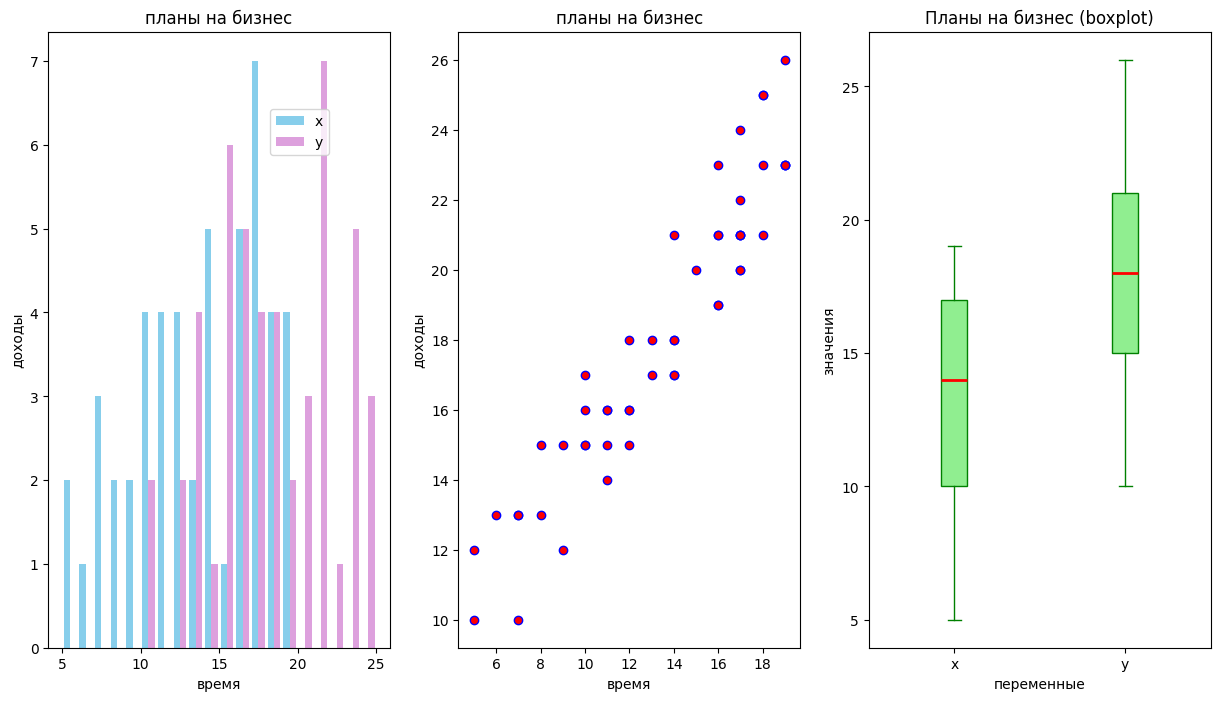

In [4]:
import numpy as np #
import matplotlib.pyplot as plt # подключаем библиотеку

# задаем данные
x = np.random.randint(low=5, high=20, size=50) #
y = x + np.random.randint(3, 8, size=x.size) #
data = np.column_stack((x, y)) #

fig, (ax2, ax1, ax3) = plt.subplots( #делаем полотно с несколькими графиками
    nrows=1, ncols=3, # расположенными в один ряд два столбца
    figsize=(15, 8) # размер полотна
) #

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b') # строим первый график дискретного распределения
ax1.set_title('планы на бизнес') # название первого графика
ax1.set_xlabel('время') # название горизонтальной оси первого графика, используем курсив
ax1.set_ylabel('доходы') # название вертикальной оси первого графика, используем курсив

ax2.hist( # строим второй график - гистограмму
    data, bins=np.arange(data.min(), data.max()),  # задаем данные и диапазоны
    color=['skyblue', 'plum'],
    label=('x', 'y') # и подписи данных
)
ax2.set_xlabel('время')
ax2.set_ylabel('доходы')
ax2.legend(loc=(0.65, 0.8)) # отображаем легенду и задаем ее расположение
ax2.set_title('планы на бизнес') # название второго графика

ax3.boxplot(
    data,                                        # данные (две колонки)
    patch_artist=True,                           # закрашиваем "ящики"
    labels=['x', 'y'],                           # подписи к данным
    boxprops=dict(facecolor='lightgreen', color='green'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='green'),
    capprops=dict(color='green')
)
ax3.set_title('Планы на бизнес (boxplot)')       # заголовок
ax3.set_xlabel('переменные')                     # подпись оси X
ax3.set_ylabel('значения')
plt.savefig("C:/Users/fedor/Documents/proga/repository-fedi-gr1/homeworks/HW02/figures/plots.png")
plt.show() # отображаем полотна